In [ ]:
# Membru 1
# Nume, prenume: Mihaica Bogdan-Claudiu
# Numar matricol: 310910401RSL221139
# Email: claudiumihaica12@gmail.com
# Discord: bogdogun

# Membru 2
# Nume, prenume: Bejenaru Matei-Ioan
# Numar matricol: 310910401RSL221029
# Email: bejmafei@gmail.com
# Discord: bejenarumatei

# Procent AI rezolvare tema: 40%

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [59]:
# def f(x):
#     return 4*x**4 - 12*x**3 + 30*x**2 + 12
# def f(x):
#     return np.sin(x) - np.cos(x)
# def f(x):
#     return np.sin(2*x) + np.sin(x) + np.cos(3*x)
def f(x):
    return np.sin(x) ** 2 - np.cos(x) ** 2

# Citirea intervalului din fișier
def read_interval(filename="interval3.txt"):
    with open(filename, 'r') as file:
        lines = file.readlines()
        x0 = float(lines[0].strip())
        xn = float(lines[1].strip())
        return x0, xn

# Generarea punctelor de interpolare
def generate_points(x0, xn, n):
    points = [x0]
    inner_points = []

    for _ in range(n-1):
        new_point = random.uniform(x0, xn)
        inner_points.append(new_point)
    
    inner_points.sort()
    points.extend(inner_points)
    points.append(xn)
    
    return np.array(points)

# Metoda celor mai mici patrate pt aproximarea polinomiala
def least_squares_polynomial(x, y, m):
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = np.sum(x ** (i + j))
        b[i] = np.sum(y * (x ** i))
    
    coeffs = np.linalg.solve(A, b)
    
    return coeffs

# Schema lui Horner pentru evaluarea polinomului
def horner(coeffs, x):
    result = 0
    for coef in reversed(coeffs):
        result = result * x + coef
    return result

# Calculul erorilor
def calculate_errors(coeffs, x_vals, y_vals, x_prime):
    p_x_prime = horner(coeffs, x_prime)
    error_x_prime = abs(p_x_prime - f(x_prime))

    sum_errors = 0
    for i in range(len(x_vals)):
        p_xi = horner(coeffs, x_vals[i])
        sum_errors += abs(p_xi - y_vals[i])
    
    return p_x_prime, error_x_prime, sum_errors


Polinomul de grad 1:
Coeficientii polinomului: [ 0.06015141 -0.04576447]
Pm(3.5848253332865085) = -0.10390620368378634
|Pm(3.5848253332865085) - f(3.5848253332865085)| = 0.5282485546901459
Suma erorilor absolute: 6.223307724981209


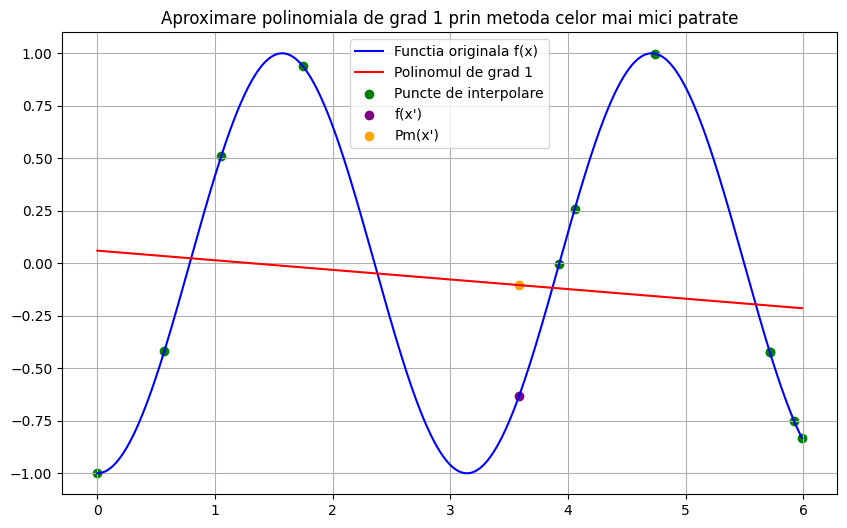


Polinomul de grad 2:
Coeficientii polinomului: [-0.79593282  1.08473105 -0.18023159]
Pm(3.5848253332865085) = 0.7764872345697672
|Pm(3.5848253332865085) - f(3.5848253332865085)| = 1.4086419929436995
Suma erorilor absolute: 3.1558948611954136


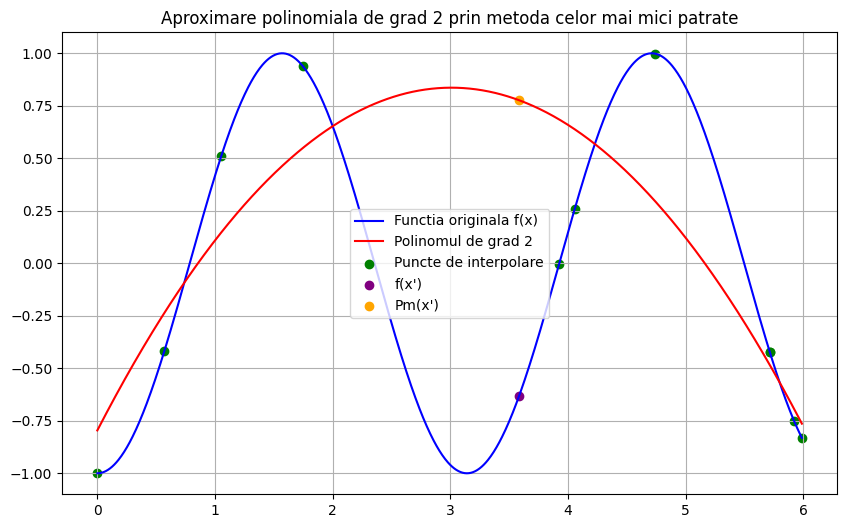


Polinomul de grad 3:
Coeficientii polinomului: [-1.00139109  1.63566303 -0.40625483  0.02376539]
Pm(3.5848253332865085) = 0.7362413196733868
|Pm(3.5848253332865085) - f(3.5848253332865085)| = 1.368396078047319
Suma erorilor absolute: 2.7617132338113213


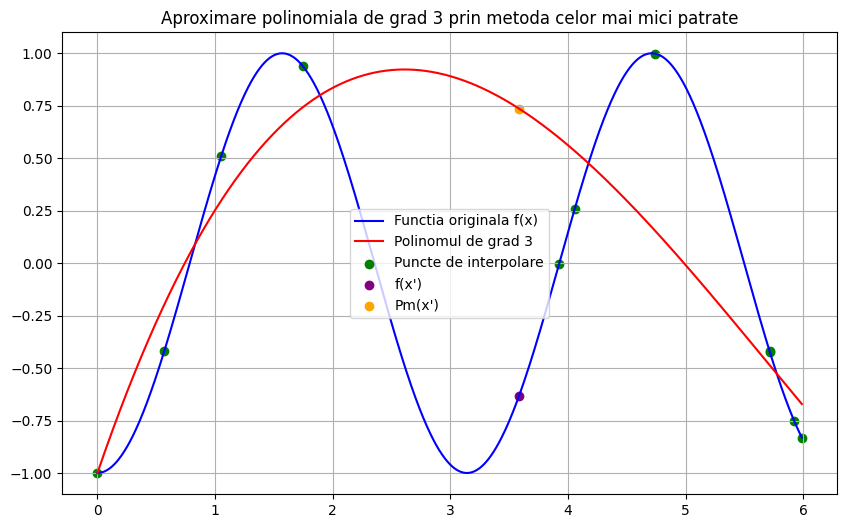


Polinomul de grad 4:
Coeficientii polinomului: [-1.20153517  3.09561471 -1.84499962  0.43328649 -0.03508493]
Pm(3.5848253332865085) = 0.352330215797116
|Pm(3.5848253332865085) - f(3.5848253332865085)| = 0.9844849741710482
Suma erorilor absolute: 2.4594811830823575


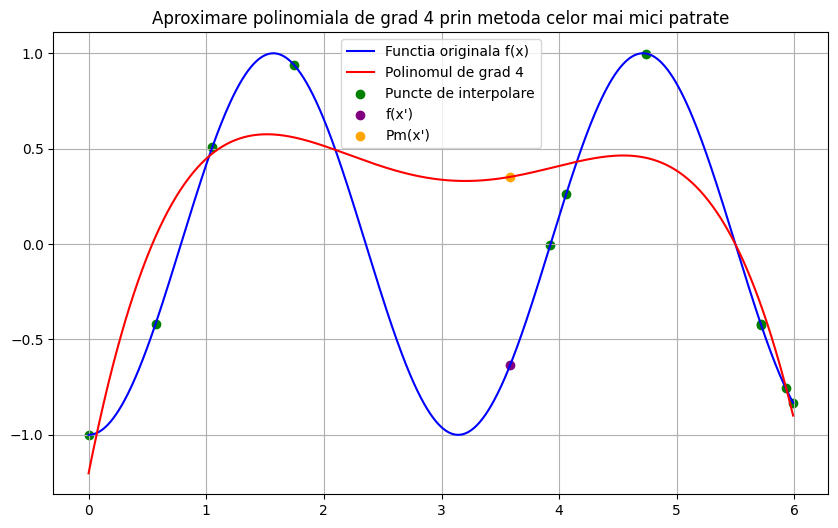


Polinomul de grad 5:
Coeficientii polinomului: [-1.0605134   1.19273642  0.86284737 -0.833336    0.20445809 -0.01585283]
Pm(3.5848253332865085) = 0.2936058097184304
|Pm(3.5848253332865085) - f(3.5848253332865085)| = 0.9257605680923626
Suma erorilor absolute: 2.0926475461641623


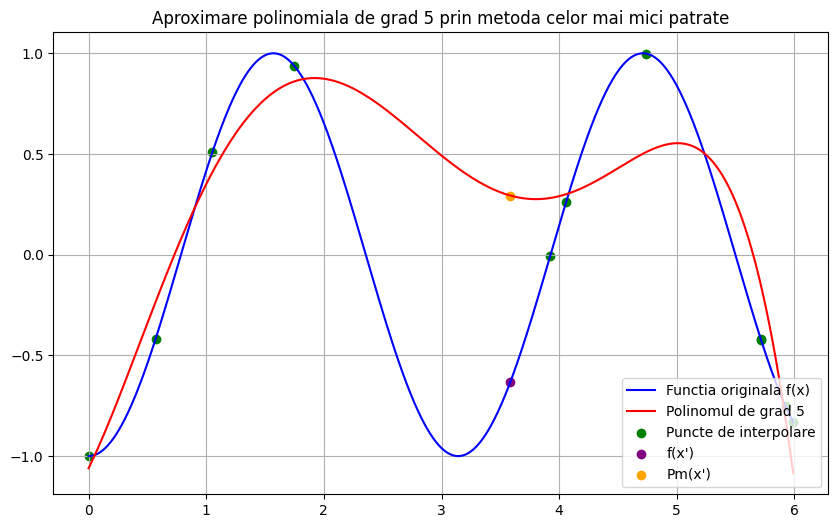

In [66]:
n = 10
x0, xn = read_interval()

x_values = generate_points(x0, xn, n)

y_values = np.array([f(x) for x in x_values])

x_prime = np.mean(x_values)

for m in range(1, 6):
    print(f"\nPolinomul de grad {m}:")
    
    coeffs = least_squares_polynomial(x_values, y_values, m)
    
    p_x_prime, error_x_prime, sum_errors = calculate_errors(
        coeffs, x_values, y_values, x_prime
    )
    
    print(f"Coeficientii polinomului: {coeffs}")
    print(f"Pm({x_prime}) = {p_x_prime}")
    print(f"|Pm({x_prime}) - f({x_prime})| = {error_x_prime}")
    print(f"Suma erorilor absolute: {sum_errors}")
    
    x_plot = np.linspace(x0, xn, 1000)
    y_plot = np.array([f(x) for x in x_plot])
    
    y_poly = np.zeros_like(x_plot)
    for i, x in enumerate(x_plot):
        y_poly[i] = horner(coeffs, x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, 'b-', label='Functia originala f(x)')
    plt.plot(x_plot, y_poly, 'r-', label=f'Polinomul de grad {m}')
    plt.scatter(x_values, y_values, color='green', label='Puncte de interpolare')
    plt.scatter([x_prime], [f(x_prime)], color='purple', label='f(x\')')
    plt.scatter([x_prime], [p_x_prime], color='orange', label='Pm(x\')')
    plt.legend()
    plt.title(f'Aproximare polinomiala de grad {m} prin metoda celor mai mici patrate')
    plt.grid(True)
    plt.show()
